<h2 style="text-align: center;"><strong>Ford Car Price Prediction Using Regression Models</strong></h2>

In this project, the goal is to predict the resale price of Ford cars using a structured machine learning workflow. The project will follow these steps:

- Explore and analyze the dataset to understand patterns and relationships in the data  
- Preprocess the data to handle missing values, encode categorical variables, and scale features  
- Split the data into training and testing sets to evaluate model performance fairly  
- Apply multiple regression algorithms to learn patterns from the training data  
- Evaluate each algorithm using standard regression metrics to assess accuracy and performance  
- Compare the results to identify the best performing approach  
- Interpret the results and draw conclusions to provide actionable insights  

This workflow ensures a systematic approach to solving the car price prediction problem while demonstrating a clear understanding of machine learning processes.

---

In [2643]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models (scaled datasets)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Regression Models (non-scaled datasets - tree-based)
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Metrics / Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

## **Dataset Overview**

In [2644]:
df = pd.read_csv("ford.csv")
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [2645]:
df.shape

(17966, 9)

In [2646]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [2647]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [2648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [2649]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

---

## **Exploratory Data Analysis**

<Axes: xlabel='price', ylabel='Count'>

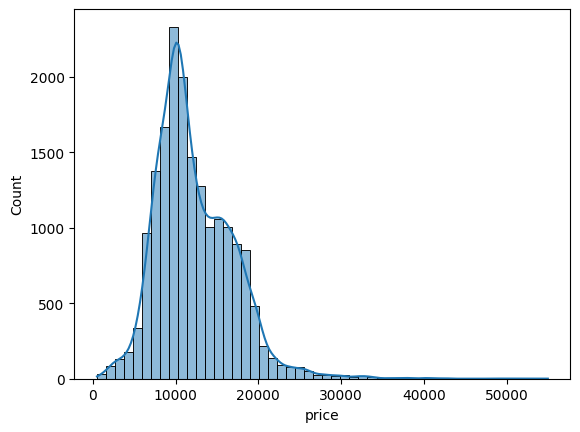

In [2650]:
sns.histplot(df['price'],bins=50, kde=True)

**Correlation Analysis Between Features and Target**

<Axes: >

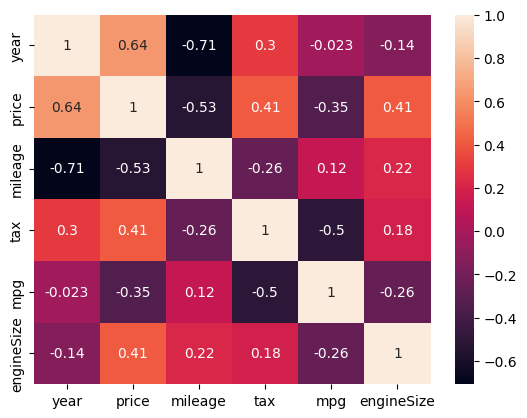

In [2651]:
sns.heatmap(df.corr(numeric_only = True), annot = True)

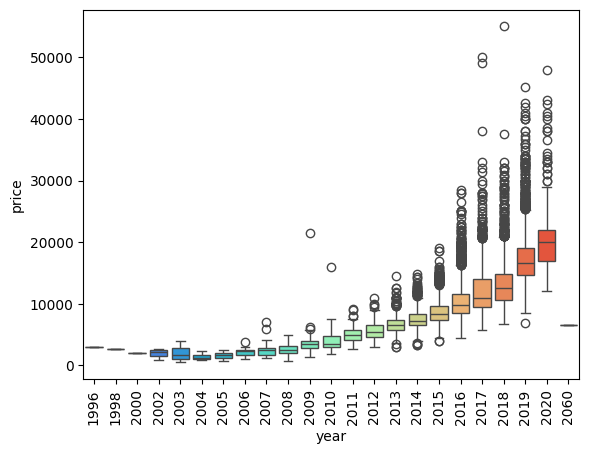

In [2652]:
sns.boxplot(data = df, x='year', y='price',palette='rainbow')
plt.show(plt.xticks(rotation=90))

<Axes: xlabel='mileage', ylabel='price'>

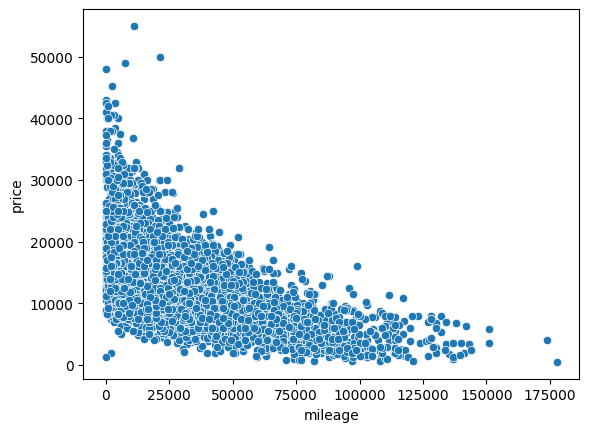

In [2653]:
sns.scatterplot(data=df, x='mileage', y='price')

<Axes: xlabel='engineSize', ylabel='price'>

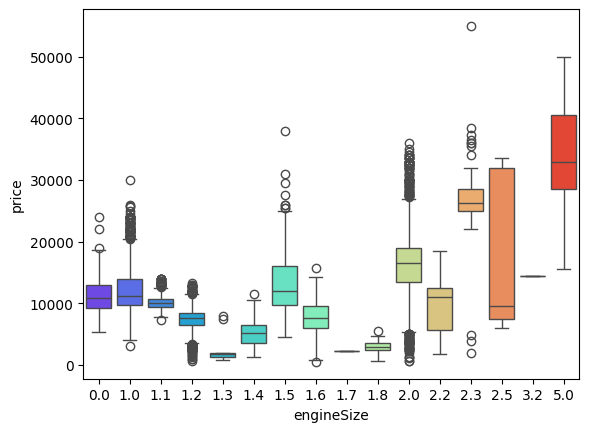

In [2654]:
sns.boxplot(data=df, x='engineSize', y='price',palette='rainbow')

<Axes: xlabel='mpg', ylabel='price'>

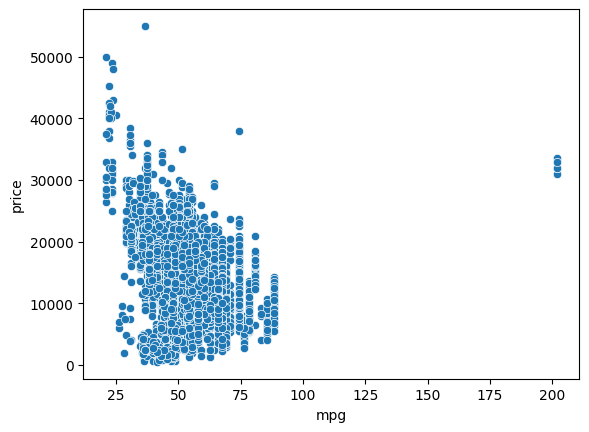

In [2655]:
sns.scatterplot(data=df, x='mpg', y='price')

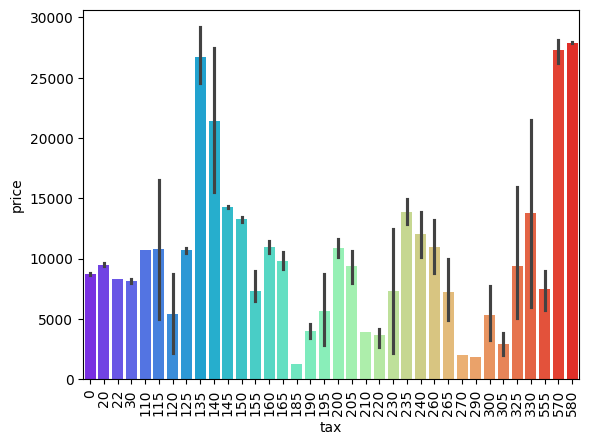

In [2656]:
sns.barplot(data=df, x='tax', y='price',palette='rainbow')
plt.show(plt.xticks(rotation=90))

**Analyzing Correlations for Non-Numeric Features Excluded from the Heatmap**

<Axes: xlabel='transmission', ylabel='price'>

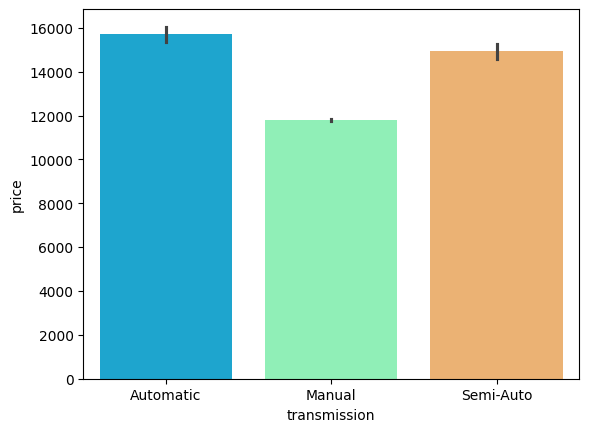

In [2657]:
sns.barplot(data=df, x='transmission', y='price',palette='rainbow')

<Axes: xlabel='fuelType', ylabel='price'>

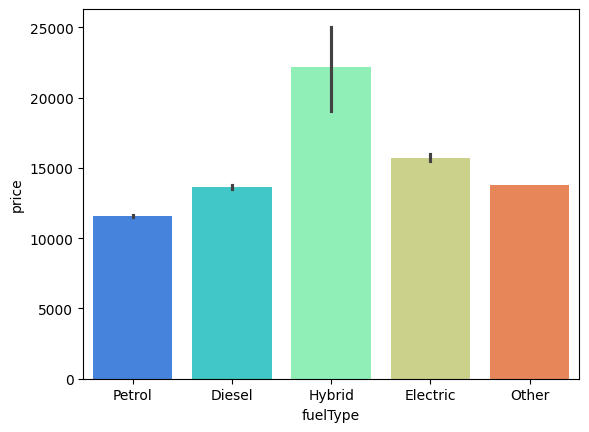

In [2658]:
sns.barplot(data=df, x='fuelType', y='price',palette='rainbow')

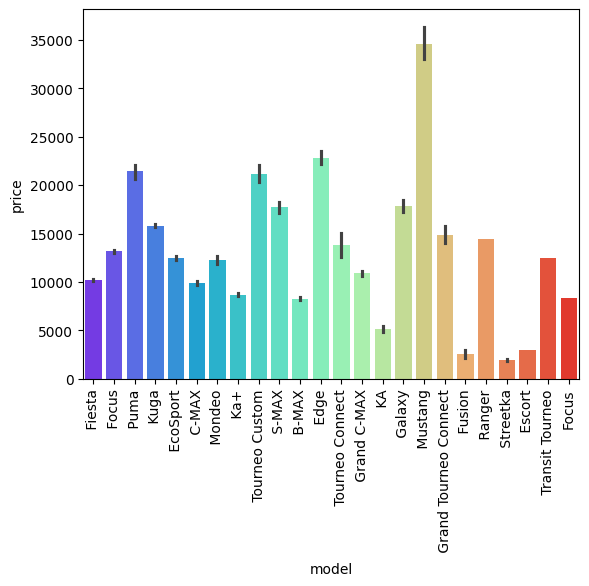

In [2659]:
sns.barplot(data=df, x='model', y='price', palette='rainbow')
plt.show(plt.xticks(rotation=90))

---

## **Data Preprocessing**

**Preparing $X$ and $y$ for Features and Target Variable**

In [2660]:
X = df.drop(columns='price')
y = df['price']

In [2661]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

**Applying One-Hot Encoding to Categorical Features**

In [2662]:
categorical_features = ['model','transmission','fuelType']
X_one_encode = pd.get_dummies(X,columns=categorical_features, drop_first=True)
X_one_encode

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
1,2018,9083,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,2017,12456,150,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2019,10460,145,40.3,1.5,False,False,False,False,True,...,False,False,False,False,True,False,False,False,False,True
4,2019,1482,145,48.7,1.0,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47.1,1.4,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17962,2014,40700,30,57.7,1.0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
17963,2015,7010,20,67.3,1.6,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
17964,2018,5007,145,57.7,1.2,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


**Converting Binary Features to Integer Format**

In [2663]:
X_ohe = X_ohe.astype(int)
X_ohe

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,2017,16700,150,47,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17962,2014,40700,30,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
17963,2015,7010,20,67,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,2018,5007,145,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


**Applying Label Encoding to Categorical Features**

In [2664]:
X_le = X.copy()
for i in categorical_features:
    le = LabelEncoder()
    X_le[i] = le.fit_transform(X_le[i])

### **Features Scaling**

In [2665]:
scaler = StandardScaler()

**Standardizing Numerical Features in** $X$**_ohe**

In [2666]:
X_ohe.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15944,150,57,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2018,9083,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2017,12456,150,57,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,2019,10460,145,40,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,2019,1482,145,48,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [2667]:
X_ohe_scaled = X_ohe.copy()

In [2668]:
numerical_features = ['year','mileage','tax','mpg']

X_ohe_scaled[numerical_features] = scaler.fit_transform(X_ohe[numerical_features])
X_ohe_scaled.head()

,year,mileage,tax,mpg,engineSize,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,...,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus,transmission_Manual,transmission_Semi-Auto,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0.065128,-0.380998,0.591358,-0.042122,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0.552866,-0.733359,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.065128,-0.560132,0.591358,-0.042122,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,1.040605,-0.662640,0.510727,-1.721198,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
4,1.040605,-1.123724,0.510727,-0.931045,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


**Standardizing Numerical Features in** $X$**_le**

In [2669]:
X_le.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5,2017,0,15944,4,150,57.7,1.0
1,6,2018,1,9083,4,150,57.7,1.0
2,6,2017,1,12456,4,150,57.7,1.0
3,5,2019,1,10460,4,145,40.3,1.5
4,5,2019,0,1482,4,145,48.7,1.0


In [2670]:
X_le_scaled = X_le.copy()

In [2671]:
X_le_scaled[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']] = scaler.fit_transform(X_le[['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize']])
X_le_scaled

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,-0.460699,0.065128,-2.670032,-0.380998,0.688777,0.591358,-0.020442,-0.811386
1,-0.211477,0.552866,0.041351,-0.733359,0.688777,0.591358,-0.020442,-0.811386
2,-0.211477,0.065128,0.041351,-0.560132,0.688777,0.591358,-0.020442,-0.811386
3,-0.460699,1.040605,0.041351,-0.662640,0.688777,0.510727,-1.738890,0.345070
4,-0.460699,1.040605,-2.670032,-1.123724,0.688777,0.510727,-0.909294,-0.811386
...,...,...,...,...,...,...,...,...
17961,-1.706810,0.065128,0.041351,-0.342172,0.688777,0.591358,-1.067312,0.113779
17962,-1.706810,-1.398088,0.041351,0.890398,0.688777,-1.343791,-0.020442,-0.811386
17963,-0.211477,-0.910349,0.041351,-0.839822,-1.454098,-1.505053,0.927668,0.576362
17964,1.034634,0.552866,0.041351,-0.942690,0.688777,0.510727,-0.020442,-0.348804


### **Splitting all DataFrames into Training and Test sets**

$X$**_le**

In [2672]:
X_train_le, X_test_le, y_train, y_test = train_test_split(X_le, y, test_size=0.20, random_state=42)

$X$**_le_scaled**

In [2673]:
X_train_le_scaled, X_test_le_scaled, y_train, y_test = train_test_split(X_le_scaled, y, test_size=0.20, random_state=42)

$X$**_ohe**

In [2674]:
X_train_ohe, X_test_ohe, y_train, y_test = train_test_split(X_ohe, y, test_size=0.20, random_state=42)

$X$**_ohe_scaled**

In [2675]:
X_train_ohe_scaled, X_test_ohe_scaled, y_train, y_test = train_test_split(X_ohe_scaled, y, test_size=0.20, random_state=42)

---

## **Model Development**